In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ri=pd.read_csv("churn.csv")

In [3]:
ri.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
ri.shape

(7043, 21)

In [5]:
ri.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Checking For Null


In [6]:
ri.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Their is no missing value in any of the columns in the dataset

In [7]:
ri.dropna(how='any',inplace=True)
ri.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## counts of churn

In [8]:
ri['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

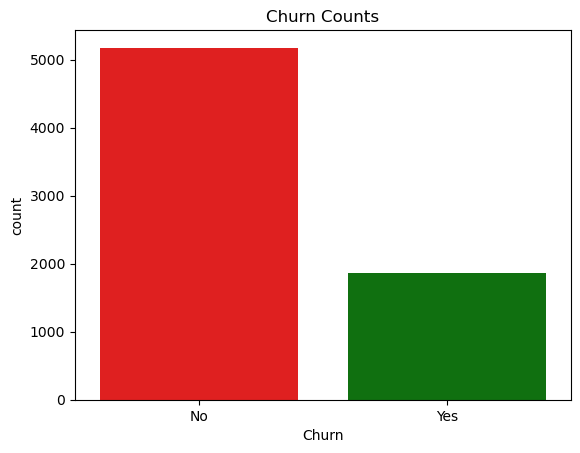

In [9]:
sns.countplot(x='Churn',palette=['red','green'],data=ri)
plt.title('Churn Counts')
plt.show()

### Churn base on Gender 

In [10]:
ri.groupby('Churn').gender.value_counts().unstack()

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


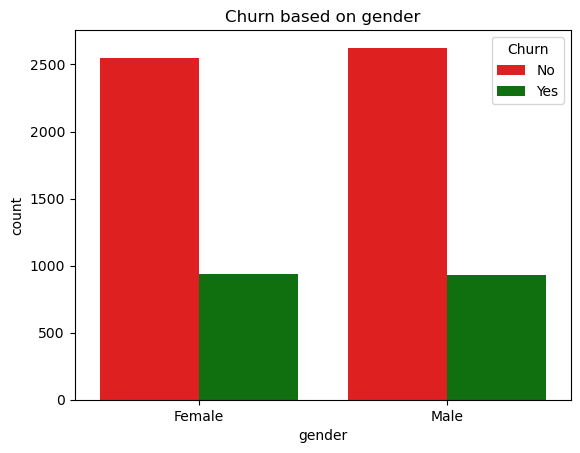

In [11]:
sns.countplot(x='gender',hue='Churn',palette=['red','green'],data=ri)
plt.title('Churn based on gender')
plt.show()

## Churn base on InternetService

In [12]:
ri.groupby('Churn').InternetService.value_counts().unstack()

InternetService,DSL,Fiber optic,No
Churn,,,
No,1962,1799,1413
Yes,459,1297,113


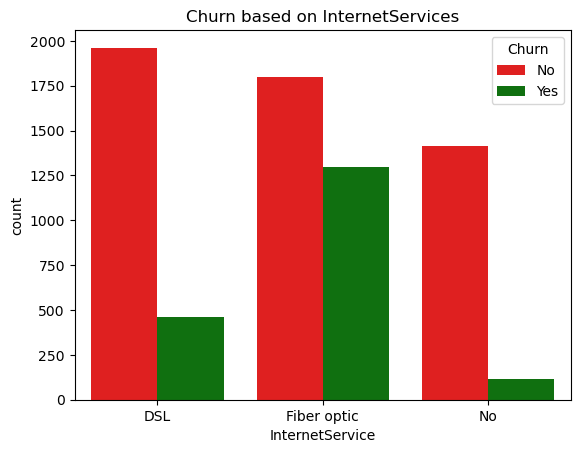

In [13]:
sns.countplot(x='InternetService',hue='Churn',palette=['red','green'],data=ri)
plt.title('Churn based on InternetServices')
plt.show()

## Churn based on Payment method

In [14]:
ri.groupby('Churn').PaymentMethod.value_counts().unstack()

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


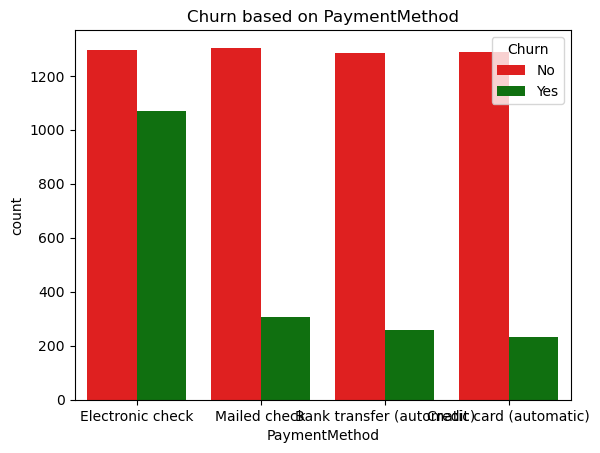

In [15]:
sns.countplot(x='PaymentMethod',hue='Churn',palette=['red','green'],data=ri)
plt.title('Churn based on PaymentMethod')
plt.show()

## Churn base on Contract

In [16]:
ri.groupby('Churn').Contract.value_counts().unstack()

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


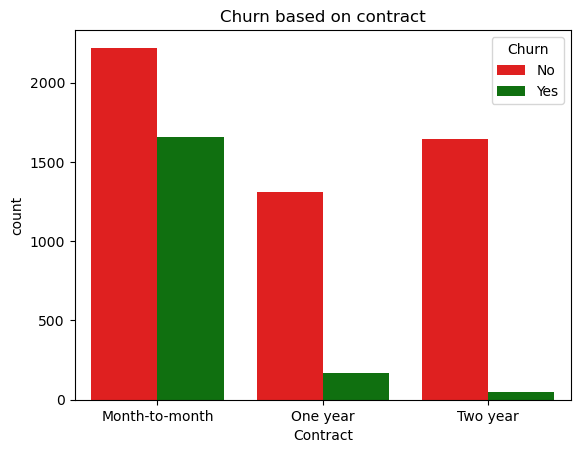

In [17]:
sns.countplot(x='Contract',hue='Churn',palette=['red','green'],data=ri)
plt.title('Churn based on contract')
plt.show()

## Churn base on Senior citizen

In [18]:
ri.groupby('Churn').SeniorCitizen.value_counts().unstack()

SeniorCitizen,0,1
Churn,,
No,4508,666
Yes,1393,476


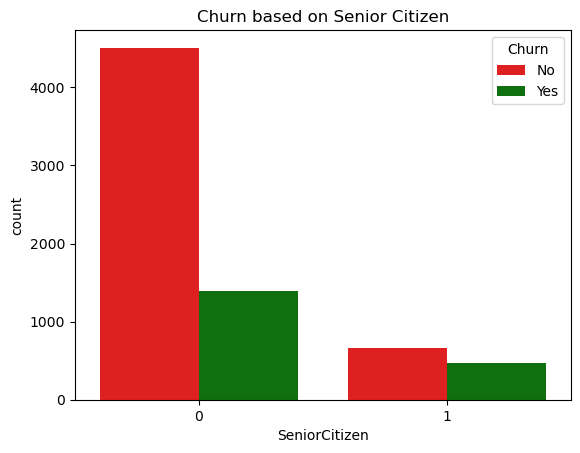

In [19]:
sns.countplot(x='SeniorCitizen',hue='Churn',palette=['red','green'],data=ri)
plt.title('Churn based on Senior Citizen')
plt.show()

In [20]:
ri.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Top 3 with the largest MonthlyCharges

In [21]:
ri.nlargest(3,'MonthlyCharges')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
2115,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.6,No
3894,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No


## Histogram of Tenure

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Tenure')

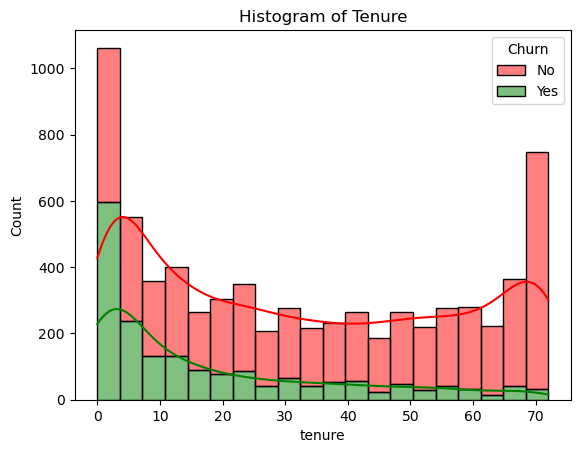

In [22]:

sns.histplot(bins=20,kde=True,data=ri,x='tenure',hue='Churn',multiple='stack',palette=['red','green'])
plt.title('Histogram of Tenure')

## Boxplot Monthly Charges

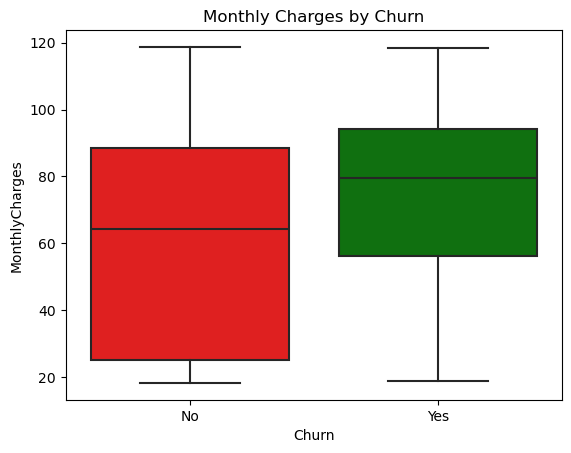

In [23]:

sns.boxplot(x='Churn',y='MonthlyCharges',palette=['red','green'],data=ri)
plt.title('Monthly Charges by Churn')
plt.show()

## Corrolation HeatMap

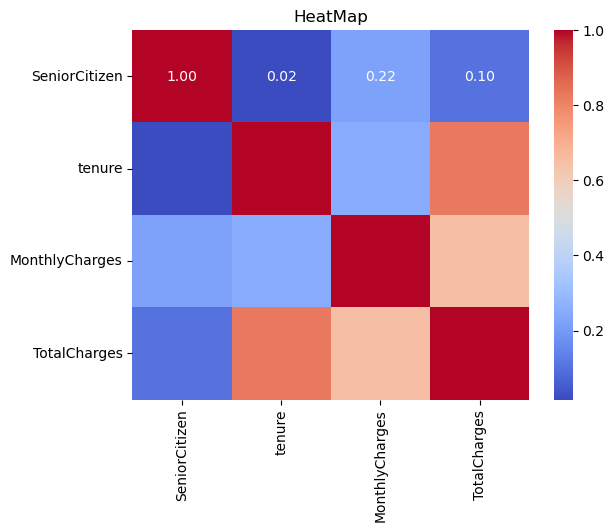

In [24]:
ri['TotalCharges']=pd.to_numeric(ri['TotalCharges'],errors='coerce')
numeric_ri=ri.select_dtypes(include=['number'])
sns.heatmap(numeric_ri.corr(), annot=True,cmap='coolwarm',fmt='.2f')
plt.title('HeatMap')
plt.show()

In [25]:
ri.drop(columns=['customerID'],inplace=True)
ri.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [26]:
ri['Churn']=ri['Churn'].map({'Yes':1,'No':0})

In [27]:
df=pd.get_dummies(ri)
df.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True


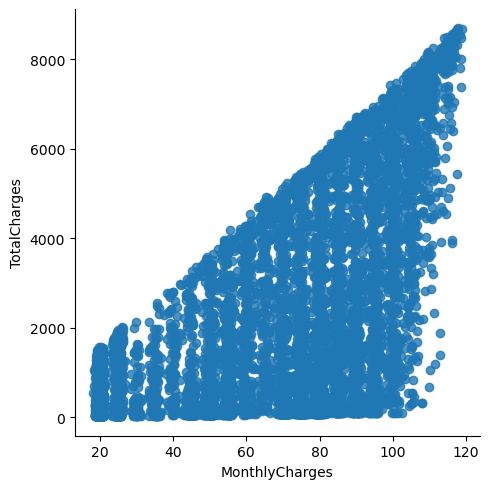

In [28]:
sns.lmplot(data=df,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [29]:
df['MonthlyCharges'].corr(df['TotalCharges'])

0.6510648032262024

## which is a strong positive linear corrolation

<Axes: >

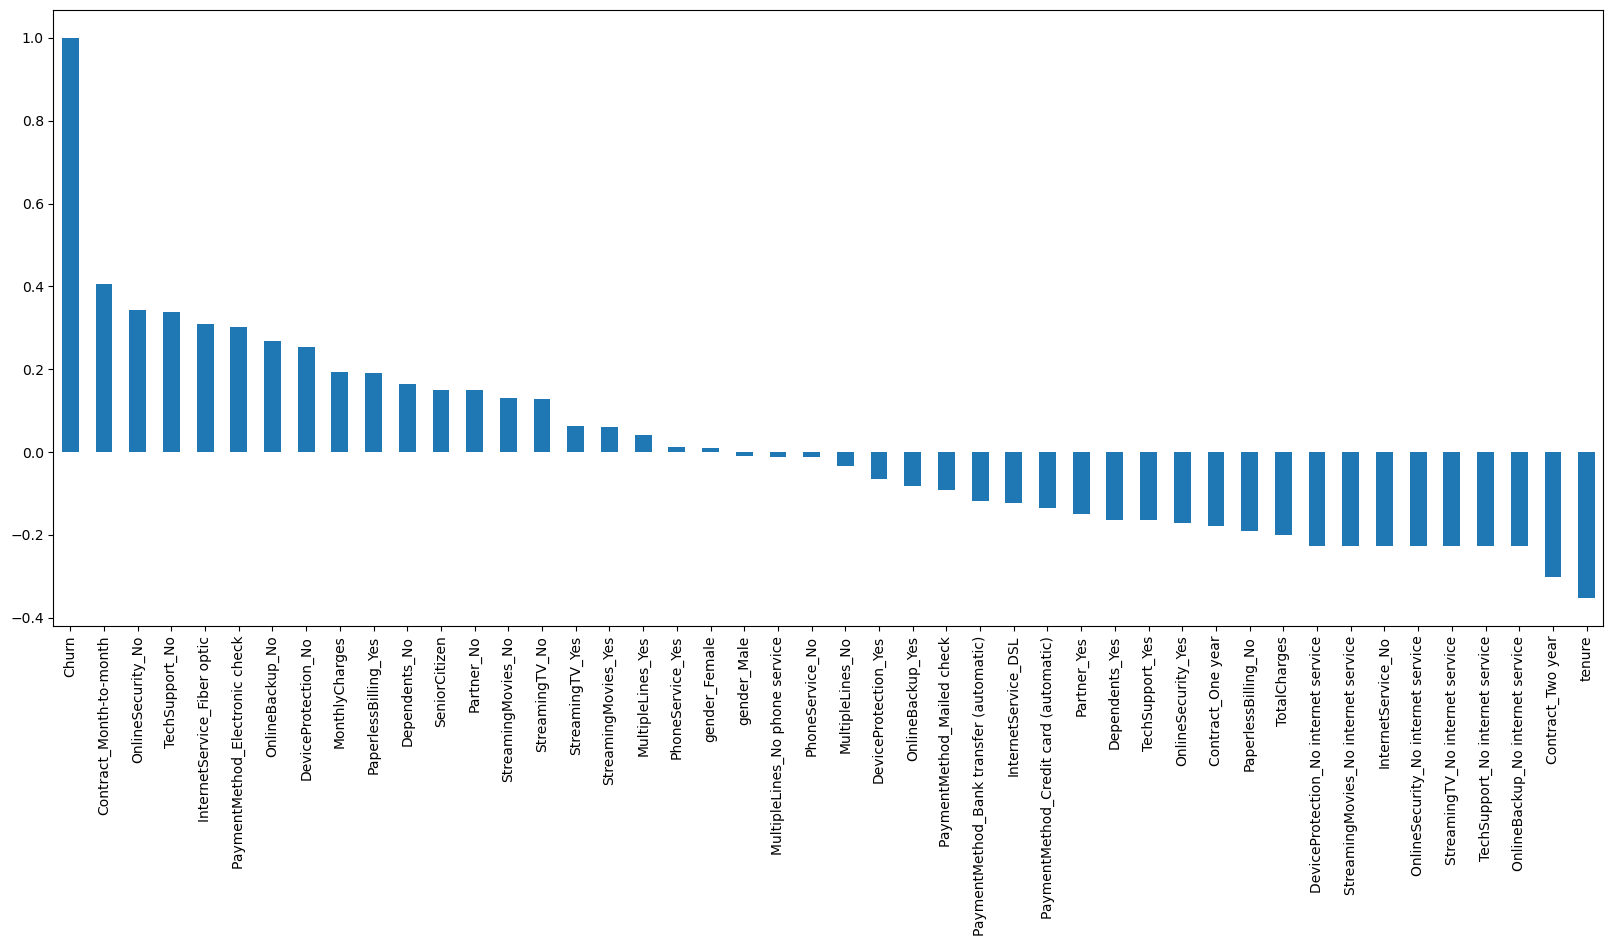

In [30]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

#### Thisindicating that customers on month-month contact are more likely to churn,conversely,features with Tenure, two year contract have negative corrolation with churn

<Axes: >

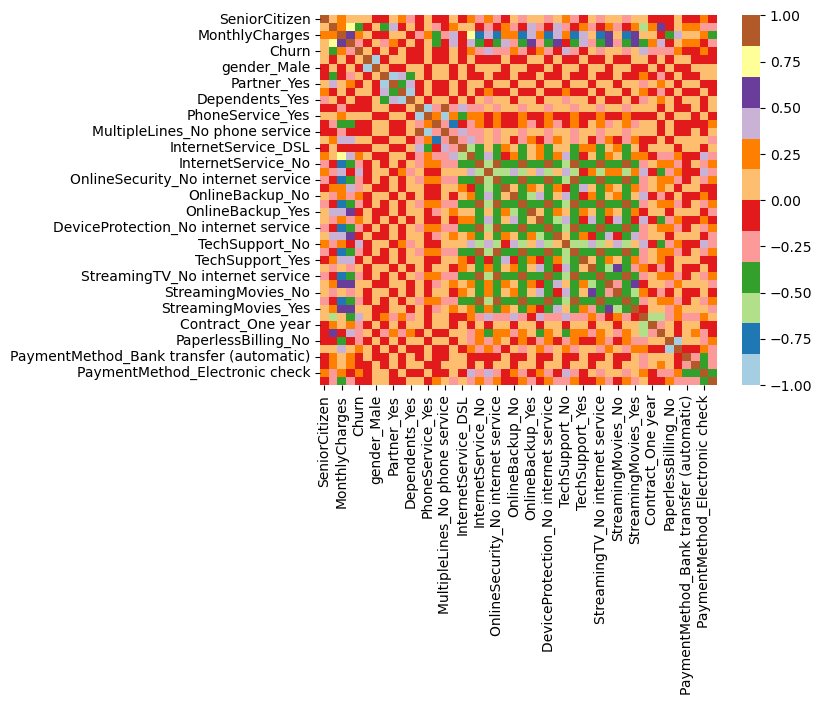

In [31]:
sns.heatmap(df.corr(),cmap='Paired')